# Early Detection of COVID-19 from Chest X-ray.
# Deep Learning - CNN Model

Hi All,

Here, I created my own deep learning(CNN) model for early detection of COVID-19 from chest x-ray images. I f we were to answer of the question that why we need a deep learning model for early detection of COVID-19 from chest x-ray images, we can say the followings, doctors have seen that even if the test kits desined for diagnosis results in negative, the real results are positive for some patients when they review the chest X-ray images. For now the public dataset contains less amount of data which you can see in the dataset2 folder. We get this dataset from open-source https://github.com/ieee8023/covid-chestxray-dataset, but for sure it is not enough to train a proper deep learning model. But just to show that how easy it is to create an AI for the early detection of these kind of viruses. Just keep in mind that this cannot be used for diagnosis without training many more images in high-resolution and professinal medical tests. There you go! Let's work together to fight against COVID-19. As a tool, I used Keras with Tensorflow background, and the model can be improved by addig more convolution and pooling layers, and increasing the number of feature detectors'.

Don't forget to upvote.

Best Regards.

In [1]:
#Importing required libraries.
from keras.models import Sequential
# To initialize neural network
from keras.layers import Convolution2D
# Images are two dimensional, concolution step
from keras.layers import MaxPooling2D
# Pooling step
from keras.layers import Flatten
# Convert pools feature map into this large feature vector
from keras.layers import Dense
#To add fully connected layers

Using TensorFlow backend.


In [2]:
#Initializing the CNN
#There is also a graph option but we'll use sequential ANN Model
classifier = Sequential()

#step 1 - Convolution
#creating the feature map by using feature detector from ınput image

classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
#32 Feature maps&detetctors uses 3 by 3 matrices, we can put 128 in the powerful machines


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  


In [3]:
#step -2 Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#second convolution and pooling steps.
classifier.add( Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """


In [4]:
#step -3 Flattening
classifier.add(Flatten())

In [5]:
#step-4 Full connection step
classifier.add(Dense(output_dim = 256, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))
#binary outcome

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#compiling the cnn

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [7]:
#Fitting to CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/kaggle/input/chestdataset/dataset2/two/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        '/kaggle/input/chestdataset/dataset2/two/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
#We'll try to train with 100 Epochs
results=classifier.fit_generator(
        training_set,
        samples_per_epoch=130,
        nb_epoch=100,
        validation_data=test_set,
        nb_val_samples=18,verbose=1)

Found 130 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., verbose=1, steps_per_epoch=4, epochs=100, validation_steps=18)`


Epoch 1/100
4/4 [==============================] - 14s 4s/step - loss: 0.7322 - accuracy: 0.4796 - val_loss: 0.6775 - val_accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 12s 3s/step - loss: 0.6584 - accuracy: 0.5391 - val_loss: 0.6408 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 11s 3s/step - loss: 0.6528 - accuracy: 0.6765 - val_loss: 0.5710 - val_accuracy: 0.7778
Epoch 4/100
4/4 [==============================] - 11s 3s/step - loss: 0.5648 - accuracy: 0.7266 - val_loss: 0.4870 - val_accuracy: 0.7222
Epoch 5/100
4/4 [==============================] - 11s 3s/step - loss: 0.4179 - accuracy: 0.8878 - val_loss: 0.3484 - val_accuracy: 0.7778
Epoch 6/100
4/4 [==============================] - 9s 2s/step - loss: 0.3501 - accuracy: 0.8906 - val_loss: 0.1819 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 12s 3s/step - loss: 0.1907 - accuracy: 0.9286 - val_loss: 0.0880 - val_accuracy: 1.0000
Epoch 8/100
4/4 [===========

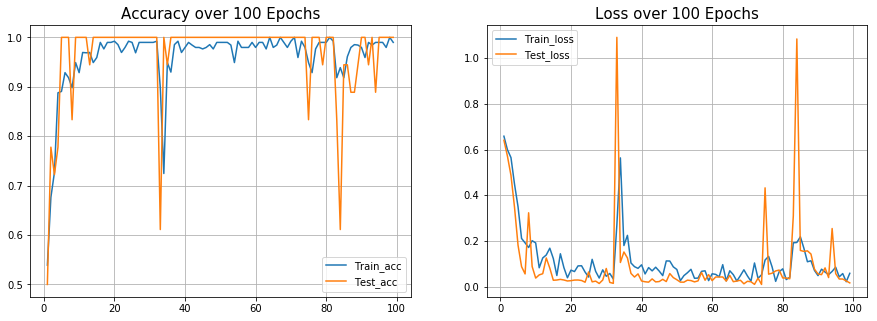

In [8]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 100)

In [9]:
# Part 3 - Making new predictions
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(training_set.class_indices)


{'covid': 0, 'normal': 1}


Populating the interactive namespace from numpy and matplotlib


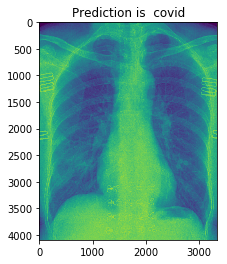

In [10]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/kaggle/input/chestdataset/dataset2/two/single_prediction/covid.jpeg')
imgplot = plt.imshow(img)

test_image = image.load_img('/kaggle/input/chestdataset/dataset2/two/single_prediction/covid.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


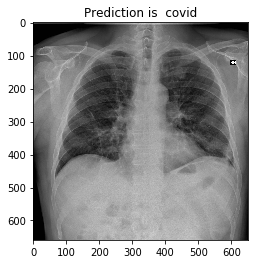

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/kaggle/input/chestdataset/dataset2/two/single_prediction/covid2.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('/kaggle/input/chestdataset/dataset2/two/single_prediction/covid2.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction is  '+ prediction )

#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


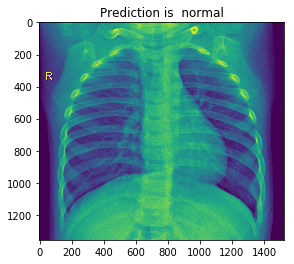

In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/kaggle/input/chestdataset/dataset2/two/single_prediction/normal.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

img=mpimg.imread('/kaggle/input/chestdataset/dataset2/two/single_prediction/normal.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'covid'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction is  '+ prediction )